In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

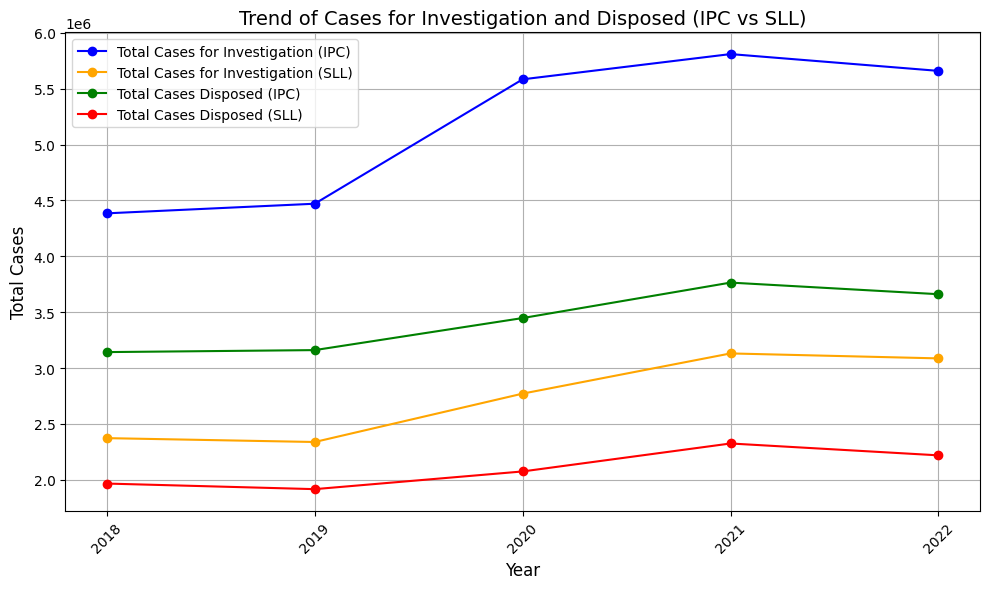

In [3]:
df = pd.read_excel('/content/drive/MyDrive/Dataset_EDA/4/Crime_Disposal_Trend_Line.xlsx')

plt.figure(figsize=(10,6))
plt.plot(df['Year'], df['Total Cases for Investigation (IPC)'], label='Total Cases for Investigation (IPC)', marker='o', color='blue')
plt.plot(df['Year'], df['Total Cases for Investigation (SLL)'], label='Total Cases for Investigation (SLL)', marker='o', color='orange')
plt.plot(df['Year'], df['Total Cases Disposed (IPC)'], label='Total Cases Disposed (IPC)', marker='o', color='green')
plt.plot(df['Year'], df['Total Cases Disposed (SLL)'], label='Total Cases Disposed (SLL)', marker='o', color='red')

plt.title("Trend of Cases for Investigation and Disposed (IPC vs SLL)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Cases", fontsize=12)
plt.legend()

plt.grid(True)
plt.xticks(df['Year'], rotation=45)
plt.tight_layout()
plt.show()


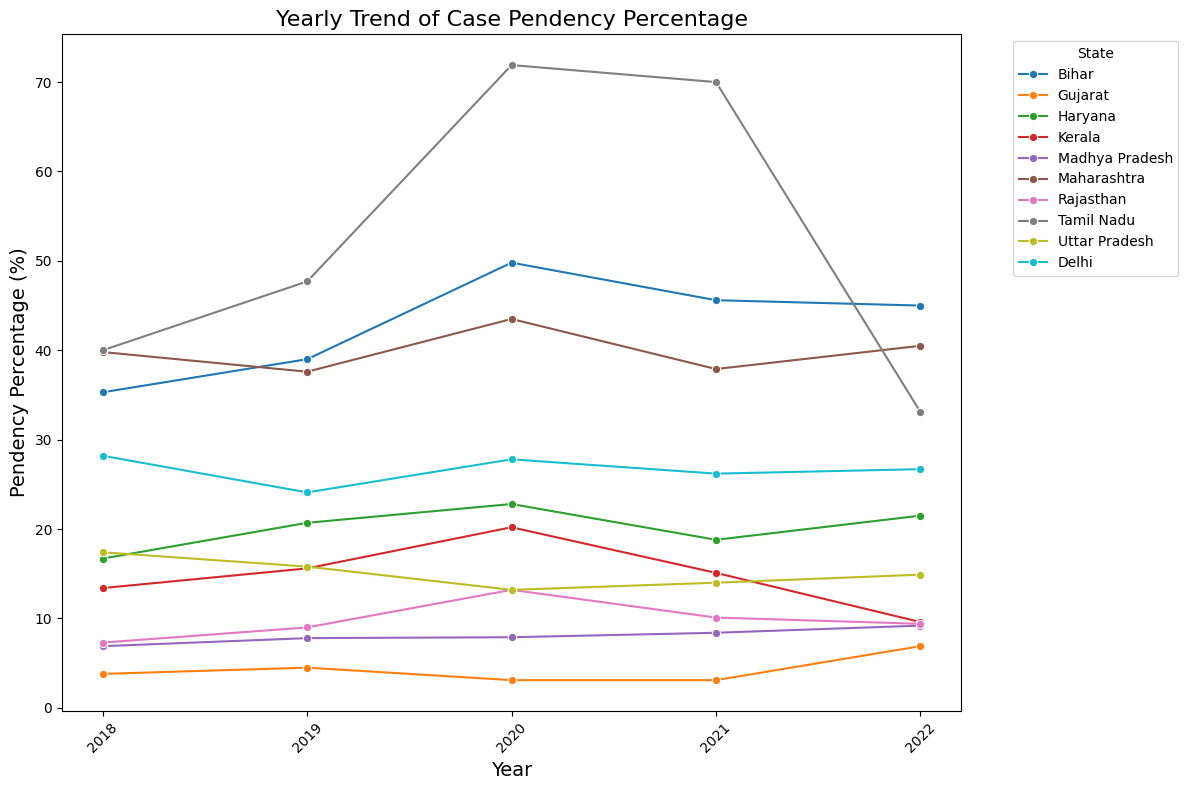

In [4]:
df_pendency_trend = pd.read_excel('/content/drive/MyDrive/Dataset_EDA/4/Case_Pendency_Percentage_Trend_10States.xlsx')

df_pendency_long = df_pendency_trend.melt(id_vars=['State'], var_name='Year', value_name='Pendency_Percentage')

df_pendency_long['Year'] = df_pendency_long['Year'].astype(int)

plt.figure(figsize=(12, 8))
sns.lineplot(data=df_pendency_long, x='Year', y='Pendency_Percentage', hue='State', marker='o', palette="tab10")

plt.title("Yearly Trend of Case Pendency Percentage", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Pendency Percentage (%)", fontsize=14)
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(df_pendency_long['Year'].unique(), rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

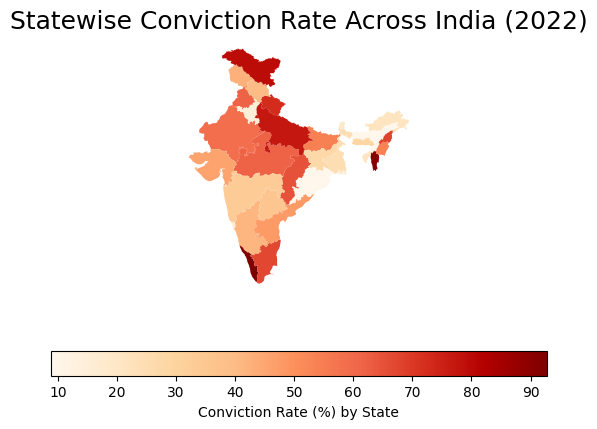

In [5]:
state_data2022 = pd.read_excel('/content/drive/MyDrive/Dataset_EDA/4/StateData2022.xlsx')

state_data2022['Conviction Rate'] = (state_data2022['Cases Convicted'] / state_data2022['Total Cases Disposed Off by Courts']) * 100

india_map = gpd.read_file('/content/drive/MyDrive/Dataset_EDA/India_shapefile/Admin2.shp')
india_map = india_map.merge(state_data2022, left_on="ST_NM", right_on="State", how="left")

plt.figure(figsize=(12, 10))
india_map.plot(column='Conviction Rate', cmap='OrRd', legend=True,
               legend_kwds={'label': "Conviction Rate (%) by State", 'orientation': "horizontal"})
plt.title("Statewise Conviction Rate Across India (2022)", fontsize=18)
plt.axis("off")
plt.show()



<Figure size 1200x1000 with 0 Axes>

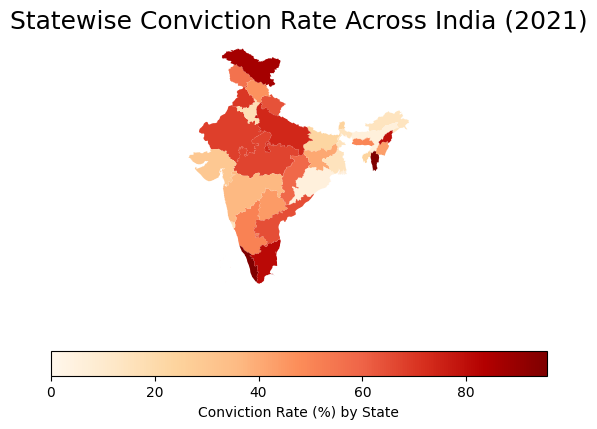

In [6]:
state_data2021 = pd.read_excel('/content/drive/MyDrive/Dataset_EDA/4/StateData2021.xlsx')

state_data2021['Conviction Rate'] = (state_data2021['Cases Convicted'] / state_data2021['Total Cases Disposed Off by Courts']) * 100

india_map = gpd.read_file('/content/drive/MyDrive/Dataset_EDA/India_shapefile/Admin2.shp')
india_map = india_map.merge(state_data2021, left_on="ST_NM", right_on="State", how="left")

plt.figure(figsize=(12, 10))
india_map.plot(column='Conviction Rate', cmap='OrRd', legend=True,
               legend_kwds={'label': "Conviction Rate (%) by State", 'orientation': "horizontal"})
plt.title("Statewise Conviction Rate Across India (2021)", fontsize=18)
plt.axis("off")
plt.show()

In [7]:
import plotly.express as px

state_data = pd.read_excel('/content/drive/MyDrive/Dataset_EDA/4/StateData2022.xlsx')

sunburst_data = pd.DataFrame({
    'Level1': ['Total Cases Disposed Off by Courts'] * 10,
    'Level2': [
        'Convicted',
        'Acquitted',
        'Quashed',
        'Disposed Off Without Trial',
        'Plea Bargaining',
        'Abated by Court',
        'Withdrawn from Prosecution',
        'Compounded or Compromised',
        'Discharged',
        'Abated'
    ],
    'Values': [
        state_data['Cases Convicted'].sum(),
        state_data['Cases Acquitted'].sum(),
        state_data['Cases Quashed'].sum(),
        state_data['Cases Disposed Off Without Trial'].sum(),
        state_data['Cases Disposed Off by Plea Bargaining'].sum(),
        state_data['Cases Abated by Court'].sum(),
        state_data['Cases Withdrawn from Prosecution'].sum(),
        state_data['Cases Compounded or Compromised'].sum(),
        state_data['Cases Discharged'].sum(),
        state_data['Cases Abated'].sum()
    ]
})

fig = px.sunburst(
    sunburst_data,
    path=['Level1', 'Level2'],
    values='Values',
    color='Values',
    color_continuous_scale='OrRd',
    title="Breakdown of Case Dispositions (2022)"
)

fig.update_layout(
    title_font_size=20,
    margin=dict(t=50, l=0, r=0, b=0)
)

fig.show()

In [8]:

state_data2 = pd.read_excel('/content/drive/MyDrive/Dataset_EDA/4/StateData2021.xlsx')

sunburst_data2 = pd.DataFrame({
    'Level1': ['Total Cases Disposed Off by Courts'] * 10,
    'Level2': [
        'Convicted',
        'Acquitted',
        'Quashed',
        'Disposed Off Without Trial',
        'Plea Bargaining',
        'Abated by Court',
        'Withdrawn from Prosecution',
        'Compounded or Compromised',
        'Discharged',
        'Abated'
    ],
    'Values': [
        state_data2['Cases Convicted'].sum(),
        state_data2['Cases Acquitted'].sum(),
        state_data2['Cases Quashed'].sum(),
        state_data2['Cases Disposed Off Without Trial'].sum(),
        state_data2['Cases Disposed Off by Plea Bargaining'].sum(),
        state_data2['Cases Abated by Court'].sum(),
        state_data2['Cases Withdrawn from Prosecution'].sum(),
        state_data2['Cases Compounded or Compromised'].sum(),
        state_data2['Cases Discharged'].sum(),
        state_data2['Cases Abated'].sum()
    ]
})

fig = px.sunburst(
    sunburst_data2,
    path=['Level1', 'Level2'],
    values='Values',
    color='Values',
    color_continuous_scale='OrRd',
    title="Breakdown of Case Dispositions (2021)"
)

fig.update_layout(
    title_font_size=20,
    margin=dict(t=50, l=0, r=0, b=0)
)

fig.show()

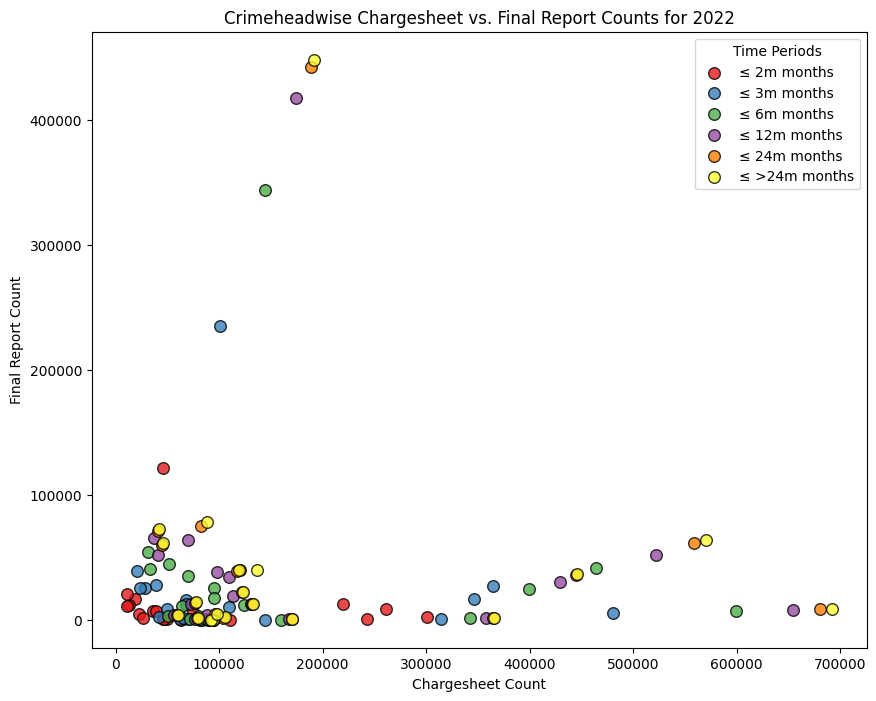

In [9]:
file_path = '/content/drive/MyDrive/Dataset_EDA/4/TimeTaken2022.xlsx'
data = pd.read_excel(file_path)

column_pairs = [
    ('CS_2m', 'FR_2m'), ('CS_3m', 'FR_3m'), ('CS_6m', 'FR_6m'),
    ('CS_12m', 'FR_12m'), ('CS_24m', 'FR_24m'), ('CS_>24m', 'FR_>24m')
]


colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33']

plt.figure(figsize=(10, 8))
for i, (cs_col, fr_col) in enumerate(column_pairs):
    plt.scatter(data[cs_col], data[fr_col], color=colors[i],
                label=f'≤ {cs_col.split("_")[1]} months', alpha=0.8, edgecolor='k', s=70)

plt.title('Crimeheadwise Chargesheet vs. Final Report Counts for 2022')
plt.xlabel('Chargesheet Count')
plt.ylabel('Final Report Count')
plt.legend(title='Time Periods')

plt.show()

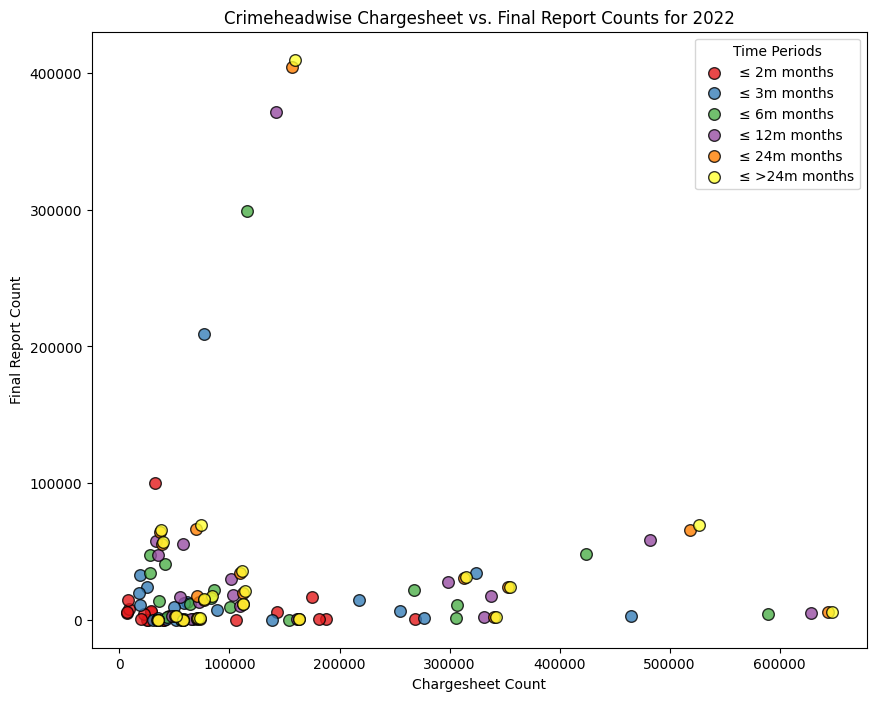

In [10]:
file_path = '/content/drive/MyDrive/Dataset_EDA/4/TimeTaken2021.xlsx'
data = pd.read_excel(file_path)

column_pairs2 = [
    ('CS_2m', 'FR_2m'), ('CS_3m', 'FR_3m'), ('CS_6m', 'FR_6m'),
    ('CS_12m', 'FR_12m'), ('CS_24m', 'FR_24m'), ('CS_>24m', 'FR_>24m')
]


colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33']

plt.figure(figsize=(10, 8))
for i, (cs_col, fr_col) in enumerate(column_pairs2):
    plt.scatter(data[cs_col], data[fr_col], color=colors[i],
                label=f'≤ {cs_col.split("_")[1]} months', alpha=0.8, edgecolor='k', s=70)

plt.title('Crimeheadwise Chargesheet vs. Final Report Counts for 2022')
plt.xlabel('Chargesheet Count')
plt.ylabel('Final Report Count')
plt.legend(title='Time Periods')

plt.show()